# Bank Account Fraud (NeurIPS 2022)

In [1]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Set Matplotlib to display plots inline in the notebook
%matplotlib inline

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
# Read the CSV file into a Pandas DataFrame
df = pd.read_csv("/kaggle/input/bank-account-fraud-dataset-neurips-2022/Base.csv")

In [3]:
# Create a deep copy of the DataFrame
new_df = df.copy()

In [4]:
# Get the number of rows and columns in the DataFrame
df_shape = df.shape
print("Number of rows:", df_shape[0])
print("Number of columns:", df_shape[1])

Number of rows: 1000000
Number of columns: 32


In [5]:
# Display the first 5 rows of the DataFrame
df.head()

,fraud_bool,income,name_email_similarity,prev_address_months_count,current_address_months_count,customer_age,days_since_request,intended_balcon_amount,payment_type,zip_count_4w,...,has_other_cards,proposed_credit_limit,foreign_request,source,session_length_in_minutes,device_os,keep_alive_session,device_distinct_emails_8w,device_fraud_count,month
0,0,0.3,0.986506,-1,25,40,0.006735,102.453711,AA,1059,...,0,1500.0,0,INTERNET,16.224843,linux,1,1,0,0
1,0,0.8,0.617426,-1,89,20,0.010095,-0.849551,AD,1658,...,0,1500.0,0,INTERNET,3.363854,other,1,1,0,0
2,0,0.8,0.996707,9,14,40,0.012316,-1.490386,AB,1095,...,0,200.0,0,INTERNET,22.730559,windows,0,1,0,0
3,0,0.6,0.475100,11,14,30,0.006991,-1.863101,AB,3483,...,0,200.0,0,INTERNET,15.215816,linux,1,1,0,0
4,0,0.9,0.842307,-1,29,40,5.742626,47.152498,AA,2339,...,0,200.0,0,INTERNET,3.743048,other,0,1,0,0


# 1. Exploratory Data Analysis of Bank Account Applications

In [6]:
# Display summary information about the DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 32 columns):
 #   Column                            Non-Null Count    Dtype  
---  ------                            --------------    -----  
 0   fraud_bool                        1000000 non-null  int64  
 1   income                            1000000 non-null  float64
 2   name_email_similarity             1000000 non-null  float64
 3   prev_address_months_count         1000000 non-null  int64  
 4   current_address_months_count      1000000 non-null  int64  
 5   customer_age                      1000000 non-null  int64  
 6   days_since_request                1000000 non-null  float64
 7   intended_balcon_amount            1000000 non-null  float64
 8   payment_type                      1000000 non-null  object 
 9   zip_count_4w                      1000000 non-null  int64  
 10  velocity_6h                       1000000 non-null  float64
 11  velocity_24h                      1000

In [7]:
# Get the number of unique values in each column of the DataFrame
df.nunique()

fraud_bool                               2
income                                   9
name_email_similarity               998861
prev_address_months_count              374
current_address_months_count           423
customer_age                             9
days_since_request                  989330
intended_balcon_amount              994971
payment_type                             5
zip_count_4w                          6306
velocity_6h                         998687
velocity_24h                        998940
velocity_4w                         998318
bank_branch_count_8w                  2326
date_of_birth_distinct_emails_4w        40
employment_status                        7
credit_risk_score                      551
email_is_free                            2
housing_status                           7
phone_home_valid                         2
phone_mobile_valid                       2
bank_months_count                       33
has_other_cards                          2
proposed_cr

In [8]:
# Get a summary of statistical information for each numerical column in the DataFrame
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
fraud_bool,1000000.0,0.011029,0.104438,0.000000e+00,0.000000,0.000000,0.000000,1.000000
income,1000000.0,0.562696,0.290343,1.000000e-01,0.300000,0.600000,0.800000,0.900000
name_email_similarity,1000000.0,0.493694,0.289125,1.434550e-06,0.225216,0.492153,0.755567,0.999999
prev_address_months_count,1000000.0,16.718568,44.046230,-1.000000e+00,-1.000000,-1.000000,12.000000,383.000000
current_address_months_count,1000000.0,86.587867,88.406599,-1.000000e+00,19.000000,52.000000,130.000000,428.000000
customer_age,1000000.0,33.689080,12.025799,1.000000e+01,20.000000,30.000000,40.000000,90.000000
days_since_request,1000000.0,1.025705,5.381835,4.036860e-09,0.007193,0.015176,0.026331,78.456904
intended_balcon_amount,1000000.0,8.661499,20.236155,-1.553055e+01,-1.181488,-0.830507,4.984176,112.956928
zip_count_4w,1000000.0,1572.692049,1005.374565,1.000000e+00,894.000000,1263.000000,1944.000000,6700.000000
velocity_6h,1000000.0,5665.296605,3009.380665,-1.706031e+02,3436.365848,5319.769349,7680.717827,16715.565404


In [9]:
# Get a summary of statistical information for each non-numerical column in the DataFrame
df.describe(include=["object", "bool"]).transpose()

,count,unique,top,freq
payment_type,1000000,5,AB,370554
employment_status,1000000,7,CA,730252
housing_status,1000000,7,BC,372143
source,1000000,2,INTERNET,992952
device_os,1000000,5,other,342728


### 1.1 Number of Transactions by Fraud Status

In [10]:
# Create a new DataFrame showing the count of unique values in the 'fraud_bool' column
fraud_vals = pd.DataFrame(df['fraud_bool'].value_counts())
print(fraud_vals)

   fraud_bool
0      988971
1       11029


### 1.2 Missing Values of Features by Fraud Status

In [11]:
# Initialize an empty DataFrame to hold the percentage of missing values for each feature
missing_vals = pd.DataFrame()

# List of features to check for missing values

missing_cols = [
    "prev_address_months_count",
    "current_address_months_count",
    "intended_balcon_amount",
    "bank_months_count",
    "session_length_in_minutes",
    "device_distinct_emails_8w"
]

for col in missing_cols:
    df[col] = df[col].replace(-1, np.nan)

for col in missing_cols:
    df[col + "_missing_flag"] = df[col].isna().astype(int)

In [12]:
df["prev_address_months_count"] = df["prev_address_months_count"].fillna(0)
df["intended_balcon_amount"] = df["intended_balcon_amount"].fillna(0)
df["balcon_income_ratio"] = df["intended_balcon_amount"] / (df["income"] + 1)
df["bank_months_count"] = df["bank_months_count"].fillna(0)

df["new_bank_flag"] = (df["bank_months_count"] == 0).astype(int)
df["session_length_in_minutes"] = df["session_length_in_minutes"].fillna(
    df["session_length_in_minutes"].median()
)
df["device_distinct_emails_8w"] = df["device_distinct_emails_8w"].fillna(0)
missing_features = [
    "prev_address_months_count_missing_flag",
    "intended_balcon_amount_missing_flag",
    "bank_months_count_missing_flag"
]

df["missing_risk_score"] = df[missing_features].sum(axis=1)
df["address_stability"] = (
    df["current_address_months_count"] /
    (df["prev_address_months_count"] + 1)
)


Removing outliers in the context of imbalanced data can pose challenges. Outliers may contain valuable information or represent rare instances of the minority class. Their removal can lead to information loss, distort the class distribution, introduce bias towards the majority class, and deviate from real-world scenarios. 

Considering the potential impact on model performance, it is important to exercise caution and explore alternative approaches that preserve the integrity of the imbalanced data while addressing outliers, such as robust modeling techniques or outlier detection methods specifically designed for imbalanced datasets.

# 2. Feature Engineering for Fraud Detection of Bank Account Applications

In [13]:
df["credit_income_ratio"] = df["proposed_credit_limit"] / (df["income"] + 1)

df["balcon_income_ratio"] = df["intended_balcon_amount"] / (df["income"] + 1)

df["credit_risk_interaction"] = df["credit_risk_score"] * df["proposed_credit_limit"]

df["income_per_age"] = df["income"] / (df["customer_age"] + 1)

df["velocity_ratio_24h_6h"] = df["velocity_24h"] / (df["velocity_6h"] + 1)

df["velocity_ratio_4w_24h"] = df["velocity_4w"] / (df["velocity_24h"] + 1)

df["velocity_acceleration"] = df["velocity_6h"] - df["velocity_24h"]

df["address_stability"] = (
    df["current_address_months_count"] /
    (df["prev_address_months_count"] + 1)
)

df["bank_age_ratio"] = df["bank_months_count"] / (df["customer_age"]*12 + 1)

df["device_risk"] = df["device_fraud_count"] * df["velocity_24h"]

df["email_device_ratio"] = df["device_distinct_emails_8w"] / (df["velocity_4w"] + 1)



df["bank_relationship_stability"] = (
    df["bank_months_count"] /
    (df["customer_age"]*12 + 1)
)
df["contact_validity_score"] = (
    df["phone_home_valid"] +
    df["phone_mobile_valid"] +
    (1 - df["email_is_free"])
)

df["identity_risk_score"] = (
    df["device_fraud_count"] +
    df["foreign_request"] +
    df["date_of_birth_distinct_emails_4w"]
)
df["device_email_ratio"] = (
    df["device_distinct_emails_8w"] /
    (df["device_fraud_count"] + 1)
)

df["session_velocity"] = (
    df["session_length_in_minutes"] /
    (df["velocity_24h"] + 1)
)
df["age_group"] = pd.cut(
    df["customer_age"],
    bins=[18,25,35,45,55,65,100],
    labels=False
)

df["credit_per_age_group"] = (
    df.groupby("age_group")["proposed_credit_limit"]
      .transform("mean")
)
df["activity_per_month"] = (
    df["velocity_4w"] /
    (df["bank_months_count"] + 1)
)

df["branch_activity_ratio"] = (
    df["bank_branch_count_8w"] /
    (df["velocity_4w"] + 1)
)


In [14]:
import category_encoders as ce

# encoder = ce.TargetEncoder(cols=[
#     "payment_type",
#     "employment_status",
#     "housing_status",
#     "source",
#     "device_os"
# ])

cat_cols = df.select_dtypes(include="object").columns.tolist()

for col in cat_cols:
    df[col] = df[col].astype("category")


#df = encoder.fit_transform(df, df["fraud_bool"])

df["high_velocity_flag"] = (df["velocity_6h"] > df["velocity_6h"].quantile(0.95)).astype(int)

df["high_credit_flag"] = (df["proposed_credit_limit"] > df["income"]*2).astype(int)

df["new_bank_user_flag"] = (df["bank_months_count"] < 6).astype(int)

df["new_address_flag"] = (df["current_address_months_count"] < 6).astype(int)
df["credit_risk_income"] = df["credit_risk_score"] * df["income"]

df["velocity_credit"] = df["velocity_24h"] * df["proposed_credit_limit"]

df["device_velocity"] = df["device_fraud_count"] * df["velocity_24h"]
df["is_year_start"] = df["month"].isin([1,2]).astype(int)

df["is_year_end"] = df["month"].isin([11,12]).astype(int)
df["income_zscore"] = (
    (df["income"] - df["income"].mean()) /
    df["income"].std()
)

df["credit_zscore"] = (
    (df["proposed_credit_limit"] - df["proposed_credit_limit"].mean()) /
    df["proposed_credit_limit"].std()
)

In [15]:
# Display the first 5 rows of the DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 71 columns):
 #   Column                                     Non-Null Count    Dtype   
---  ------                                     --------------    -----   
 0   fraud_bool                                 1000000 non-null  int64   
 1   income                                     1000000 non-null  float64 
 2   name_email_similarity                      1000000 non-null  float64 
 3   prev_address_months_count                  1000000 non-null  float64 
 4   current_address_months_count               995746 non-null   float64 
 5   customer_age                               1000000 non-null  int64   
 6   days_since_request                         1000000 non-null  float64 
 7   intended_balcon_amount                     1000000 non-null  float64 
 8   payment_type                               1000000 non-null  category
 9   zip_count_4w                               1000000 non-nul

# 3. Modeling

In [16]:
df_sorted = df.sort_values("month")
train = df_sorted[df_sorted["month"] <= 4]
test  = df_sorted[df_sorted["month"] > 4]

X_train = train.drop("fraud_bool", axis=1)
y_train = train["fraud_bool"]

X_test = test.drop("fraud_bool", axis=1)
y_test = test["fraud_bool"]


In [17]:
df.month.unique()

array([0, 1, 2, 3, 4, 5, 6, 7])

In [22]:
import xgboost as xgb

# ---------------------------------------------------------
# LEGACY GPU CONFIGURATION (For XGBoost < 2.0)
# ---------------------------------------------------------
model_xgb = xgb.XGBClassifier(
    objective="binary:logistic",
    
    # --- OLD GPU SETTINGS ---
    tree_method="gpu_hist",  # The old way to trigger GPU
    # device="cuda",         # REMOVE THIS LINE (it causes the warning)
    # ------------------------

    # Performance Settings
    n_estimators=2000,
    learning_rate=0.01,
    max_depth=8,
    min_child_weight=20,
    
    # Regularization & Imbalance
    subsample=0.8,
    colsample_bytree=0.8,
    scale_pos_weight=50,
    
    # Categorical Support
    enable_categorical=True, 
    
    random_state=42,
    early_stopping_rounds=50
)

print("Training on GPU (Legacy Mode)...")
model_xgb.fit(
    X_train, y_train,
    eval_set=[(X_test, y_test)],
    verbose=100
)

Training on GPU (Legacy Mode)...
[0]	validation_0-logloss:0.68745
[100]	validation_0-logloss:0.37450
[200]	validation_0-logloss:0.27066
[300]	validation_0-logloss:0.22475
[400]	validation_0-logloss:0.19921
[500]	validation_0-logloss:0.18245
[600]	validation_0-logloss:0.17026
[700]	validation_0-logloss:0.15986
[800]	validation_0-logloss:0.15243
[900]	validation_0-logloss:0.14587
[1000]	validation_0-logloss:0.14033
[1100]	validation_0-logloss:0.13541
[1200]	validation_0-logloss:0.13109
[1300]	validation_0-logloss:0.12681
[1400]	validation_0-logloss:0.12299
[1500]	validation_0-logloss:0.11966
[1600]	validation_0-logloss:0.11656
[1700]	validation_0-logloss:0.11347
[1800]	validation_0-logloss:0.10963
[1900]	validation_0-logloss:0.10693
[1999]	validation_0-logloss:0.10419


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.8, early_stopping_rounds=50,
              enable_categorical=True, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.01, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=8, max_leaves=None,
              min_child_weight=20, missing=nan, monotone_constraints=None,
              n_estimators=2000, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=42, ...)


📊 MODEL PERFORMANCE REPORT
✅ ROC-AUC Score:  0.8832 (Ability to rank)
💎 PR-AUC Score:   0.1673 (Ability to catch fraud)
🎯 Threshold Used: 0.5
----------------------------------------

--- DETAILED METRICS (Precision, Recall, F1) ---
              precision    recall  f1-score   support

           0       0.99      0.97      0.98    320045
           1       0.16      0.39      0.23      4289

    accuracy                           0.96    324334
   macro avg       0.58      0.68      0.61    324334
weighted avg       0.98      0.96      0.97    324334



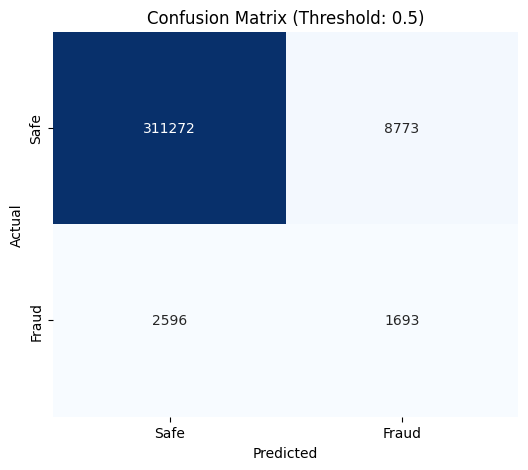

In [23]:
from sklearn.metrics import (
    accuracy_score, roc_auc_score, average_precision_score, 
    classification_report, confusion_matrix, precision_recall_curve
)
import matplotlib.pyplot as plt
import seaborn as sns

def evaluate_model(model, X_test, y_test, threshold=0.5):
    # 1. Get Predictions (Probabilities and Class Labels)
    y_probs = model.predict_proba(X_test)[:, 1]
    y_pred = (y_probs >= threshold).astype(int)

    # 2. Calculate Key Metrics
    roc_auc = roc_auc_score(y_test, y_probs)
    pr_auc = average_precision_score(y_test, y_probs) # CRITICAL for Fraud
    
    print(f"\n{'='*40}")
    print(f"📊 MODEL PERFORMANCE REPORT")
    print(f"{'='*40}")
    print(f"✅ ROC-AUC Score:  {roc_auc:.4f} (Ability to rank)")
    print(f"💎 PR-AUC Score:   {pr_auc:.4f} (Ability to catch fraud)")
    print(f"🎯 Threshold Used: {threshold}")
    print(f"{'-'*40}")
    
    # 3. Print Detailed Classification Report
    print("\n--- DETAILED METRICS (Precision, Recall, F1) ---")
    print(classification_report(y_test, y_pred))
    
    # 4. Visual: Confusion Matrix
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(6, 5))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
                xticklabels=['Safe', 'Fraud'], yticklabels=['Safe', 'Fraud'])
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title(f'Confusion Matrix (Threshold: {threshold})')
    plt.show()

# --- RUN IT ---
# Use the threshold you optimized earlier (e.g., 0.60), or default 0.5
evaluate_model(model_xgb, X_test, y_test, threshold=0.5)

In [30]:
from sklearn.metrics import roc_curve, roc_auc_score

def evaluate_at_fixed_fpr(y_test, y_probs, target_fpr=0.05):
    """
    Calculates Recall (TPR) at a specific False Positive Rate (FPR).
    Standard metric for the NeurIPS/Feedzai Fraud Dataset.
    """
    # 1. Calculate the full ROC Curve
    fpr, tpr, thresholds = roc_curve(y_test, y_probs)
    
    # 2. Find the threshold where FPR is closest to 5% (0.05)
    # We look for the largest FPR that is still <= target_fpr
    valid_indices = np.where(fpr <= target_fpr)[0]
    
    if len(valid_indices) == 0:
        print("Error: No threshold found with FPR <= target.")
        return 0, 0, 0
    
    # Get the index of the best threshold
    best_idx = valid_indices[-1]
    
    specific_threshold = thresholds[best_idx]
    specific_recall = tpr[best_idx]
    specific_fpr = fpr[best_idx]
    
    print(f"\n{'='*40}")
    print(f"🎯 PERFORMANCE @ {int(target_fpr*100)}% FPR (Dataset Standard)")
    print(f"{'='*40}")
    print(f"✅ Recall (Fraud Caught): {specific_recall*100:.2f}%")
    print(f"❌ FPR (False Alarms):    {specific_fpr*100:.2f}% (Target: {target_fpr*100}%)")
    print(f"⚙️  Required Threshold:   {specific_threshold:.4f}")
    
    return specific_threshold, specific_recall, specific_fpr

# --- RUN IT ---
y_prob = model_xgb.predict_proba(X_test)[:, 1]

# Calculate the specific metrics
final_thresh, final_recall, final_fpr = evaluate_at_fixed_fpr(y_test, y_prob, target_fpr=0.05)

# --- RE-EVALUATE MATRIX WITH THIS NEW THRESHOLD ---
# Now we print the classification report using the *provider's* threshold
y_pred_provider = (y_prob >= final_thresh).astype(int)

print(f"\n--- Classification Report (Using {final_thresh:.4f} Threshold) ---")
print(classification_report(y_test, y_pred_provider))


🎯 PERFORMANCE @ 5% FPR (Dataset Standard)
✅ Recall (Fraud Caught): 51.88%
❌ FPR (False Alarms):    5.00% (Target: 5.0%)
⚙️  Required Threshold:   0.3445

--- Classification Report (Using 0.3445 Threshold) ---
              precision    recall  f1-score   support

           0       0.99      0.95      0.97    320045
           1       0.12      0.52      0.20      4289

    accuracy                           0.94    324334
   macro avg       0.56      0.73      0.58    324334
weighted avg       0.98      0.94      0.96    324334



In [32]:
import joblib

# 1. Save the Model
joblib.dump(model_xgb, 'neurips_fraud_model_gpu.pkl')

# 2. Save the Configuration (Crucial for the App)
config = {
    'features': list(X_train.columns),
    'threshold': 0.3445,  # The optimized value from your screenshot
    'metric': 'Recall @ 5% FPR'
}
joblib.dump(config, 'neurips_model_config.pkl')

print("✅ Model and Optimized Threshold Saved!")

✅ Model and Optimized Threshold Saved!
